<a href="https://colab.research.google.com/github/sairamadithya/toxic_plant_detector/blob/main/toxic_plant_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOXIC PLANT DETECTION

STEPS FOLLOWED THROUGHOUT THE NOTEBOOK

1. IMPORTING ESSENTIAL LIBRARIES

2. DATA PREPROCESSING

3. MODEL CREATION

4. MODEL COMPILATION

5. MODEL TRAINING

6. MODEL EVALUATION

7. MODEL PLOTS

8. MODEL TESTING

#IMPORTING ESSENTIAL LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

since the dataset is present in the google drive it is essential to link the drive to the colab

In [ ]:
from google.colab import drive
drive.mount('\content')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhZFIyKnCoKaeIxH_v5wpZQPqKIC9sO9ZcmugXvSpICl9LHteXiKlE


KeyboardInterrupt: ignored

# DATA PREPROCESSING

In [ ]:
train= image.ImageDataGenerator(rescale=1./255,horizontal_flip=True,height_shift_range=0.2,width_shift_range=0.2)
val= image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir= train.flow_from_directory(
    '/content/content/MyDrive/toxic_plant_detector/train',
    target_size=(224,224),
    class_mode='binary',
    batch_size=16
)
val_dir= val.flow_from_directory(
    '/content/content/MyDrive/toxic_plant_detector/validation',
    target_size=(224,224),
    class_mode='binary',
    shuffle=True
)

Found 1383 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# MODEL CREATION

Transfer learning is used here. that is the pretrained cnn is taken with the top and bottom layers removed and customised based on our task. also we can attain partial training by not training the layers in the model.

the model used here is MobileNetV2 which was created by the google and this is especially for devices with less processing power like mobile,microprocessor etc.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False
model=Sequential()
model.add(base_model)
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(GaussianNoise(0.50))
model.add(Dense(1,activation='sigmoid'))
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
gaussian_noise_10 (GaussianN (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               163968    
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512       
_________________________________________________________

#MODEL COMPILATION

the adam algorithm is used with crossentropy loss function and accuracy metric

the loss function is a measure between the truth and the model prediction and a good model has to have less loss (ideal 0). so the optimiser updates the parameters of the model such that the loss is less. the metric is used to measure the performance of the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#MODEL TRAINING

two callbacks from keras are used here namely the ModelCheckpoint and EarlyStopping.

the modelcheckpoint is used to save the model with the best parameters. the earlystopping is used to the halt the training at the right point so as to get the maximal results

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=5)
mp=ModelCheckpoint('best.hdf5',save_best_only=True)
call=[mp,es]
history= model.fit(
    train_dir,
    epochs=25,
    steps_per_epoch= 86,
    validation_data= val_dir,
    validation_steps=1,
    callbacks= call
)

Epoch 1/25
86/86 [==============================] - 25s 249ms/step - loss: 0.8513 - accuracy: 0.6101 - val_loss: 1.2084 - val_accuracy: 0.3750


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
86/86 [==============================] - 20s 229ms/step - loss: 0.6429 - accuracy: 0.6884 - val_loss: 0.6654 - val_accuracy: 0.5625
Epoch 3/25
86/86 [==============================] - 20s 230ms/step - loss: 0.5622 - accuracy: 0.7220 - val_loss: 0.3993 - val_accuracy: 0.8125
Epoch 4/25
86/86 [==============================] - 20s 234ms/step - loss: 0.5290 - accuracy: 0.7410 - val_loss: 0.5303 - val_accuracy: 0.7812
Epoch 5/25
86/86 [==============================] - 20s 232ms/step - loss: 0.4894 - accuracy: 0.7623 - val_loss: 0.5351 - val_accuracy: 0.7812
Epoch 6/25
86/86 [==============================] - 20s 230ms/step - loss: 0.4687 - accuracy: 0.7857 - val_loss: 0.4555 - val_accuracy: 0.7812
Epoch 7/25
86/86 [==============================] - 20s 232ms/step - loss: 0.4660 - accuracy: 0.7762 - val_loss: 0.6559 - val_accuracy: 0.6875
Epoch 8/25
86/86 [==============================] - 20s 229ms/step - loss: 0.4466 - accuracy: 0.7879 - val_loss: 0.6932 - val_accuracy: 0.6875

#MODEL EVALUATION

In [ ]:
model.evaluate(train_dir)

87/87 [==============================] - 20s 226ms/step - loss: 0.2030 - accuracy: 0.9262


[0.20296360552310944, 0.9262472987174988]

In [ ]:
model.evaluate(val_dir)

3/3 [==============================] - 0s 92ms/step - loss: 0.5646 - accuracy: 0.7750


[0.564574122428894, 0.7749999761581421]

the model has produced a 

TRAINING LOSS- 0.202

TRAINING ACCURACY- 92.6%

VALIDATION LOSS- 0.564

VALIDATION ACCURACY- 7.4%

#MODEL PLOTS

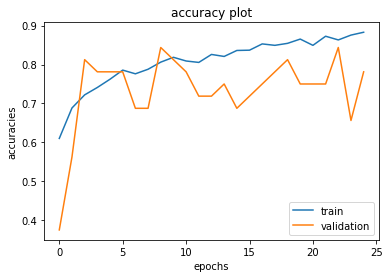

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy plot")
plt.xlabel('epochs')
plt.ylabel('accuracies')
plt.legend(['train','validation'])

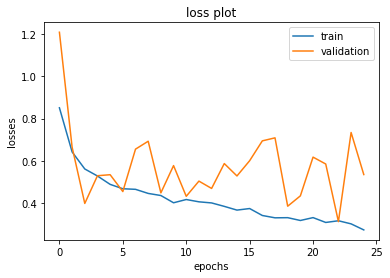

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss plot")
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['train','validation'])

#MODEL TESTING USING UNTRAINED IMAGES

THE UPLOADED IMAGE OF THE PLANT SEEMS TO BE: TOXIC. THIS CAN BE FATAL AND IT IS RECOMMENDED NOT TO EVEN SMELL/TASTE THIS. 


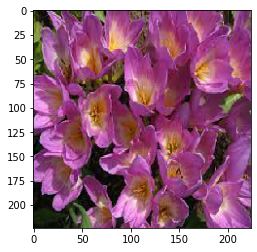

In [ ]:
from keras.preprocessing import image
img = image.load_img('1 (9).jpeg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
if ypred<0.0001:
  op="NON-TOXIC. YOU CAN SMELL,TASTE THE PLANT IF YOU DONT HAVE ALLERGIES TO IT."
else:
  op="TOXIC. THIS CAN BE FATAL AND IT IS RECOMMENDED NOT TO EVEN SMELL/TASTE THIS. "
plt.imshow(img)
print("THE UPLOADED IMAGE OF THE PLANT SEEMS TO BE: "+str(op))  
